In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("titanic/train.csv")
display(titanic_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna("Z00",inplace=True)
titanic_df['Embarked'].fillna("N", inplace=True)

#check null values
print("Total null values\n{0:}".format(titanic_df.isna().sum()))

Total null values
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [5]:
titanic_df.dtypes[titanic_df.dtypes == "object"].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [6]:
print(titanic_df["Sex"].value_counts())
print(titanic_df["Cabin"].value_counts())
print(titanic_df["Embarked"].value_counts())


male      577
female    314
Name: Sex, dtype: int64
Z00            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [7]:
titanic_df['Cabin'] = titanic_df["Cabin"].str[:1]
titanic_df['Cabin'].value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [8]:
titanic_df.groupby(['Sex','Survived'])["Sex"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

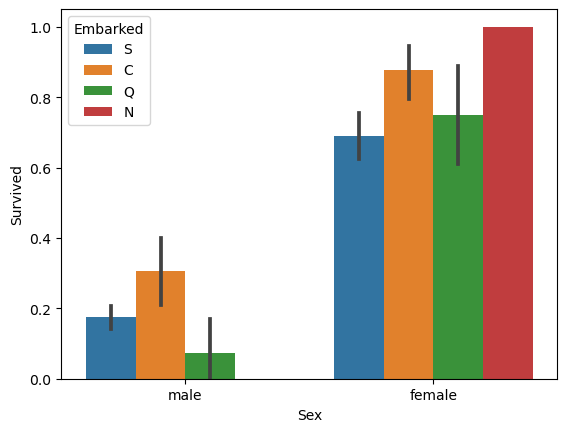

In [9]:
sns.barplot(x="Sex",y="Survived",hue="Embarked",data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

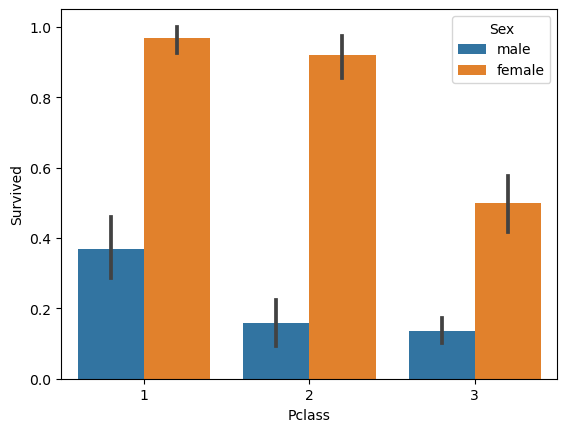

In [10]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=titanic_df)

In [11]:
from sklearn.preprocessing import LabelEncoder

def encode_features(data):
    features = ["Cabin", "Embarked"]
    le = LabelEncoder()
    for feature in features:
        le.fit(data[feature])
        data[feature]= le.transform(data[feature])
    return data

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,8,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,8,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,8,3


In [12]:
titanic_df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,8,3
1,1,1,female,38.0,1,0,71.2833,2,0
2,1,3,female,26.0,0,0,7.9250,8,3
3,1,1,female,35.0,1,0,53.1000,2,3
4,0,3,male,35.0,0,0,8.0500,8,3


In [59]:
target_df= (titanic_df["Survived"])
features = ["Pclass", "Sex", "SibSp", "Parch"]
data_df =  pd.get_dummies(titanic_df[features])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(data_df, target_df,test_size=0.2, random_state=11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 5) (179, 5) (712,) (179,)


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=1)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
lr_clf = LogisticRegression(solver='liblinear')


# RandomForestClassifier
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier Accuracy:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# DecisionTreeClassifier 학
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier Accuracy: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# LogisticRegression
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression Accuracy: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


RandomForestClassifier Accuracy:0.8324
DecisionTreeClassifier Accuracy: 0.8045
LogisticRegression Accuracy: 0.8436


In [65]:
from sklearn.model_selection import StratifiedKFold

def func_kfold(clf, fold =5):
    kfold= StratifiedKFold(fold)
    scores=[]
    
    for iter_count, (train_index,test_index) in enumerate (kfold.split(data_df,data_df["Pclass"])):
        X_train, X_test = data_df.values[train_index], data_df.values[test_index]
        y_train, y_test = target_df.values[train_index], target_df.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy= accuracy_score(y_test, predictions)
        scores.append(accuracy)
        
    mean_score = np.mean(scores)
    print(mean_score)

print(func_kfold(rf_clf, 5))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf, data_df, target_df, cv=5)

for index, accuracy in enumerate (scores):
    print("Iteration {0}: accuracy {1}".format(index ,accuracy))

print("Average accuracy:",np.mean(scores))

0.7935220639005711
None
Iteration 0: accuracy 0.7821229050279329
Iteration 1: accuracy 0.8033707865168539
Iteration 2: accuracy 0.8033707865168539
Iteration 3: accuracy 0.7921348314606742
Iteration 4: accuracy 0.8258426966292135
Average accuracy: 0.8013684012303057


In [70]:
from sklearn.model_selection import GridSearchCV

parameters= {"max_depth":[2,3,5,10], "min_samples_split":[2,3,5], "min_samples_leaf":[1,5,8]}

grid = GridSearchCV(dt_clf,param_grid=parameters,scoring="accuracy", cv=5)
grid.fit(X_train, y_train)

predict_grid = grid.best_estimator_.predict(X_test)
print("Accuracy:",accuracy_score(predict_grid, y_test))

Accuracy: 0.8268156424581006


In [66]:
test_data = pd.read_csv("titanic/test.csv")
X =  pd.get_dummies(test_data[features])
print(X)

     Pclass  SibSp  Parch  Sex_female  Sex_male
0         3      0      0           0         1
1         3      1      0           1         0
2         2      0      0           0         1
3         3      0      0           0         1
4         3      1      1           1         0
..      ...    ...    ...         ...       ...
413       3      0      0           0         1
414       1      0      0           1         0
415       3      0      0           0         1
416       3      0      0           0         1
417       3      1      1           0         1

[418 rows x 5 columns]


In [71]:
predictions = grid.best_estimator_.predict(X)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
